## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ

# Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.3333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

Using TensorFlow backend.
C:\Users\User\.conda\envs\tf1-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\.conda\envs\tf1-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\.conda\envs\tf1-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\.conda\envs\tf1-gpu\lib\site-packages\t

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    num_neurons=[256, 256, 128,128,64,64,32]
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 64)                4160

In [10]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [11]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [12]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 204us/step - loss: 1.9640 - accuracy: 0.2741 - val_loss: 1.8081 - val_accuracy: 0.3308
Epoch 2/100
50000/50000 [==============================] - 8s 170us/step - loss: 1.7380 - accuracy: 0.3715 - val_loss: 1.6912 - val_accuracy: 0.3870
Epoch 3/100
50000/50000 [==============================] - 9s 176us/step - loss: 1.6760 - accuracy: 0.3975 - val_loss: 1.6656 - val_accuracy: 0.4009
Epoch 4/100
50000/50000 [==============================] - 8s 165us/step - loss: 1.6013 - accuracy: 0.4262 - val_loss: 1.6309 - val_accuracy: 0.4172
Epoch 5/100
50000/50000 [==============================] - 8s 166us/step - loss: 1.5528 - accuracy: 0.4404 - val_loss: 1.5631 - val_accuracy: 0.4376
Epoch 6/100
50000/50000 [==============================] - 8s 157us/step - loss: 1.4990 - accuracy: 0.4637 - val_loss: 1.5148 - val_accuracy: 0.4589
Epoch 7/100
50000/50000 [=============================

Epoch 54/100
50000/50000 [==============================] - 8s 165us/step - loss: 0.6486 - accuracy: 0.7671 - val_loss: 1.9172 - val_accuracy: 0.5061
Epoch 55/100
50000/50000 [==============================] - 8s 160us/step - loss: 0.6264 - accuracy: 0.7754 - val_loss: 1.9862 - val_accuracy: 0.4993
Epoch 56/100
50000/50000 [==============================] - 8s 166us/step - loss: 0.6048 - accuracy: 0.7856 - val_loss: 1.9920 - val_accuracy: 0.5015
Epoch 57/100
50000/50000 [==============================] - 8s 160us/step - loss: 0.6017 - accuracy: 0.7831 - val_loss: 1.9559 - val_accuracy: 0.5057
Epoch 58/100
50000/50000 [==============================] - 8s 164us/step - loss: 0.5903 - accuracy: 0.7885 - val_loss: 2.0592 - val_accuracy: 0.5068
Epoch 59/100
50000/50000 [==============================] - 8s 162us/step - loss: 0.5753 - accuracy: 0.7934 - val_loss: 2.0002 - val_accuracy: 0.5039
Epoch 60/100
50000/50000 [==============================] - 9s 171us/step - loss: 0.5894 - accuracy:

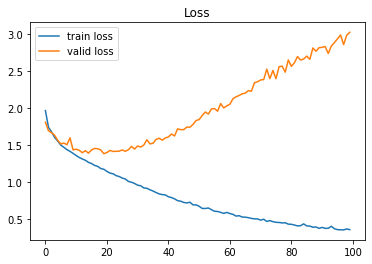

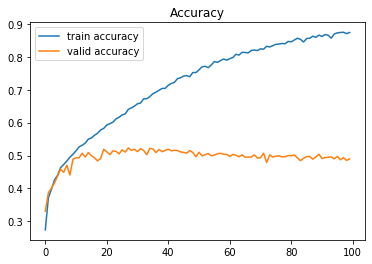

In [14]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()